In [1]:
import nltk
from nltk.corpus import inaugural, reuters
import matplotlib.pyplot as plt

<p>
<b>Problem 1</b>

a) Using one of the Corpora in the last lab. Calculate the average "Tokens" per sentence.

b) Using the same or different corpus, which category has the longest sentences on average, which has the shortest?
</p>

In [2]:
# note inaugrual.words() returns a list WITH punctuations
print('Average tokens per sentence for the inaugrual corpus is {}.'.format(round(len(inaugural.words())/len(inaugural.sents()))))

Average tokens per sentence for the inaugrual corpus is 30.


In [3]:
# create a dictionary that stores average token (WITH punctuations) per sentence for each category
cat_dic= {}
for cat in reuters.categories():  
    tokens = [word for word in reuters.words(categories=[cat])]
    cat_dic[cat] = round(len(tokens)/len(reuters.sents(categories=[cat])))
    
# sort the dictionary by value (average token per sentence)
cat_sorted = {k: v for k, v in sorted(cat_dic.items(), key=lambda item: item[1])}

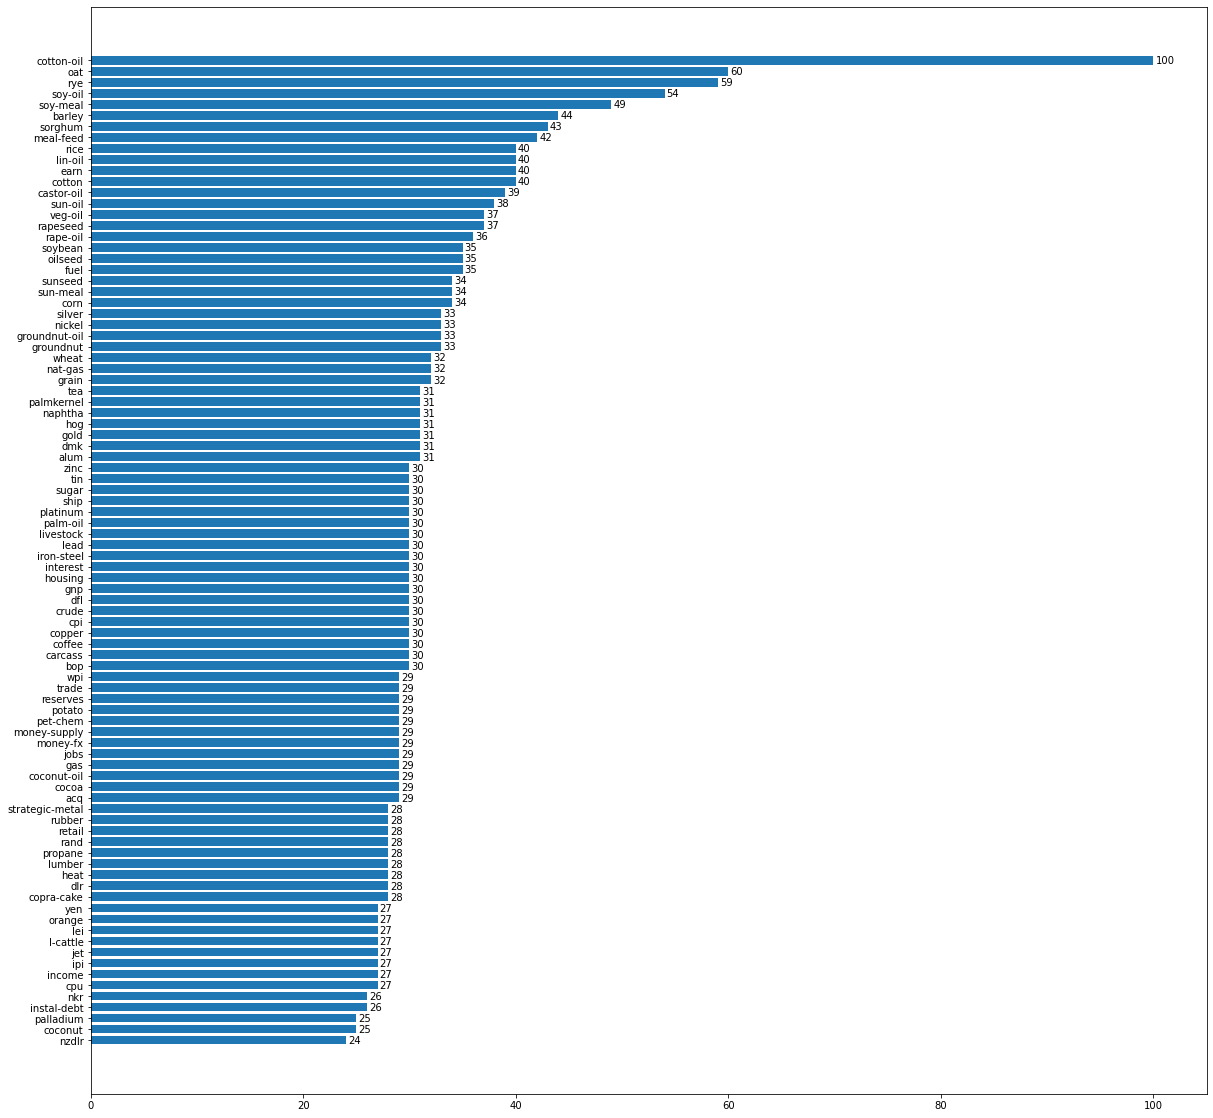

In [4]:
# indices and bar_heights
ind = list(cat_sorted.keys())
val = list(cat_sorted.values())

# plot with annotations, adjust annotations to index - 0.3 and bar_height + 0.2
fig = plt.figure(figsize=(20,20))
ax = fig.subplots()
ax.barh(ind, val)
for i, v in enumerate(val):
    ax.text(v+.2, i-.3, str(v))

<b>Cotton-oil</b> has the highest average token per sentence(100). 

<b>nzdlr</b> has the lowest average token per sentence(24).

<p>
<b>Problem 2</b>

Download your own "Corpus" on https://www.gutenberg.org/ (Links to an external site.) 

a) How many sentences are in the document (use NLTK to split the sentences)? How does this differ from the amount of lines in the file (readlines)?

b) After tokenizing the sentences, find 3 errors and describe why you think this error might of occurred. What in the algorithm might have gone wrong?
</p>    

In [5]:
from nltk.tokenize import sent_tokenize, word_tokenize
# downloaded A Boy's Trip Across the Plains by Laura Preston, filename pg63205.txt
filename = r'pg63205.txt'

# read the file by lines and read the entire string
with open(filename, 'r', encoding = 'utf-8-sig') as f:
    file_by_line = f.readlines()
    f.seek(0)
    file_content = f.read().replace('\n', ' ')

In [6]:
# compare the difference between the number of lines and the number sentences
print('The number of lines in the text file is {}. The number of sentences in the text file is {}.'.format(len(file_by_line), len(sent_tokenize(file_content))))

The number of lines in the text file is 3965. The number of sentences in the text file is 1482.


The number of lines is greater than the number of sentences because of the newline formatting.

<b>Tokenizing the corpus into sentences:</b>

In [7]:
sentences = sent_tokenize(file_content)
print('Some errors:')
print('1: {}\n2: {}\n3: {}'.format(sentences[0],sentences[5],sentences[6]))

Some errors:
1: The Project Gutenberg eBook, A Boy's Trip Across the Plains, by Laura Preston   This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions  whatsoever.
2: See       https://archive.org/details/boystripacrosspl00presrich      [Illustration]   A BOY'S TRIP ACROSS THE PLAINS.
3: by  LAURA PRESTON,  Author of "Youth's History of California."


<b>Error 1: Some sentences are not split</b>

Example: sentences[0], "The Project Gutenberg eBook, A Boy's Trip Across the Plains, by Laura Preston   This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions  whatsoever.", contains two sentences. Also sentences[5] and sentences[6] incorrectly appends 'A BOY'S TRIP ACROSS THE PLAINS.' to 'See       https://archive.org/details/boystripacrosspl00presrich      [Illustration]' instead of  'by  LAURA PRESTON,  Author of "Youth's History of California'.

Explanation: Sent_tokenizer uses Punkt tokenizer, an unsupervised algorithm by Kiss and Strunk (2005). If this pre-trained model from NLTK is trained on well-formed data, then bad formatting can result in this situation. 

Reference:
https://github.com/nltk/nltk/blob/develop/nltk/tokenize/punkt.py line 16-20 and 87-90.



<b>Tokenizing the corpus into words:</b>
    
Since now NLTK invokes Punkt Tokenizer when using word_tokenizer, there is no need to use sent_tokenize unless we need to operate at the level of sentences.

In [8]:
# tokenize at the corpus level
tokens = word_tokenize(file_content)
print(tokens)

['The', 'Project', 'Gutenberg', 'eBook', ',', 'A', 'Boy', "'s", 'Trip', 'Across', 'the', 'Plains', ',', 'by', 'Laura', 'Preston', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', "'ll", 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', '.', 'Title', ':', 'A', 'Boy', "'s", 'Trip', 'Across', 'the', 'Plains', 'Author', ':', 'Laura', 'Preston', 'Release', 'Date', ':', 'September', '15', ',', '2020', '[',

In [9]:
# tokeniz at the sentence level
print([word_tokenize(sent) for sent in sentences])

[['The', 'Project', 'Gutenberg', 'eBook', ',', 'A', 'Boy', "'s", 'Trip', 'Across', 'the', 'Plains', ',', 'by', 'Laura', 'Preston', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ['You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '.'], ['If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', "'ll", 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'ebook', '.'], ['Title', ':', 'A', 'Boy', "'s", 'Trip', 'Across', 'the', 'Plains', 'Author', ':', 'Laura', 'Preston', 'Release', 'Date', ':', 'September', '15', ',', '2020

<b>Error 2: Split Contractions.</b>

Example: "you'll" ---> 'you', "'ll" or "boy's" ---> "boy", "'s"


Explanation: <span>Word_tokenizer</span> invokes the method from TreeBankWordTokenizer which uses regular expressions to tokenize text. So word_tokenizer split standard contractions. This could result in expected output since "you" and "'ll" are two words with different meaning. But for the word "boy's", it is an error.

Reference:

https://www.nltk.org/api/nltk.tokenize.html

In [10]:
# possible workaround:
from nltk.tokenize import TweetTokenizer
test_str = r"A Boy's Trip Across the Plains, by Laura Preston"
print('Word_Tokenizer: {}'.format(word_tokenize(test_str)))
print()
print('Tweet_Tokenizer: {}'.format(TweetTokenizer().tokenize(test_str)))

Word_Tokenizer: ['A', 'Boy', "'s", 'Trip', 'Across', 'the', 'Plains', ',', 'by', 'Laura', 'Preston']

Tweet_Tokenizer: ['A', "Boy's", 'Trip', 'Across', 'the', 'Plains', ',', 'by', 'Laura', 'Preston']


<b>Error 3: Split urls</b> 

Example: "http://www.pgdp.net" ---> 'http', ':', '//www.pgdp.net'

Explanation: Similar as the contraction problem, it is because TreeBankWordTokenizer does not handle urls correctly. However, this could be a minor problem since in most cases the 'http:' prefix is not necessary for website access. 

Reference: 

https://github.com/nltk/nltk/issues/1860

source code for regexp tokenizer: https://www.nltk.org/_modules/nltk/tokenize/regexp.html


A comprehensive web url regex library: https://gist.github.com/gruber/8891611

In [11]:
# possible workaround:
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
test_str = r'''Images of the original pages are available through
      Internet Archive. See
      https://archive.org/details/boystripacrosspl00presrich
'''
pattern = r'''http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+])+        # urls
              |[()]|\s+'''                                    # parenthesis and one or more whitespace
tokenizer = RegexpTokenizer(pattern, gaps=True)
print('Word_Tokenizer: {}'.format(word_tokenize(test_str)))
print()
print('Regexp_Tokenizer: {}'.format(tokenizer.tokenize(test_str)))
print()
print('Tweet_Tokenizer: {}'.format(TweetTokenizer().tokenize(test_str)))

Word_Tokenizer: ['Images', 'of', 'the', 'original', 'pages', 'are', 'available', 'through', 'Internet', 'Archive', '.', 'See', 'https', ':', '//archive.org/details/boystripacrosspl00presrich']

Regexp_Tokenizer: ['Images', 'of', 'the', 'original', 'pages', 'are', 'available', 'through', 'Internet', 'Archive.', 'See', 'https://archive.org/details/boystripacrosspl00presrich']

Tweet_Tokenizer: ['Images', 'of', 'the', 'original', 'pages', 'are', 'available', 'through', 'Internet', 'Archive', '.', 'See', 'https://archive.org/details/boystripacrosspl00presrich']
